In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing

import datetime

%matplotlib inline

In [2]:
dataset = pd.read_csv(r'C:\Users\ChunSangWoo\Sports Betting Data Scripts by State/NV Gambling Trends.csv')
handle = dataset[['Month','SB Handle']]
handle = handle[::-1]
handle = handle.reset_index(drop=True)

handle.head()

,Month,SB Handle
0,2010-01-01,2.852976e+08
1,2010-02-01,2.211849e+08
2,2010-03-01,2.810555e+08
3,2010-04-01,1.691977e+08
4,2010-05-01,1.689981e+08


In [3]:
handle.dtypes

Month         object
SB Handle    float64
dtype: object

In [4]:
#convert 'Month' into KSP date format

epoch_0 = datetime.datetime(1970,1,1,0,0,0)

handle['Month'] = (pd.to_datetime(handle['Month'])-epoch_0) / np.timedelta64(1,'s')
handle.head()

,Month,SB Handle
0,1.262304e+09,2.852976e+08
1,1.264982e+09,2.211849e+08
2,1.267402e+09,2.810555e+08
3,1.270080e+09,1.691977e+08
4,1.272672e+09,1.689981e+08


In [5]:
handle.dtypes

Month        float64
SB Handle    float64
dtype: object

In [6]:
y = handle.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
y_scaled = min_max_scaler.fit_transform(y)
normalized_handle = pd.DataFrame(y_scaled)

In [7]:
normalized_handle.columns = ['Month','SB Handle']
normalized_handle.head()

,Month,SB Handle
0,0.000000,0.363296
1,0.008860,0.232354
2,0.016862,0.354632
3,0.025722,0.126177
4,0.034296,0.125769


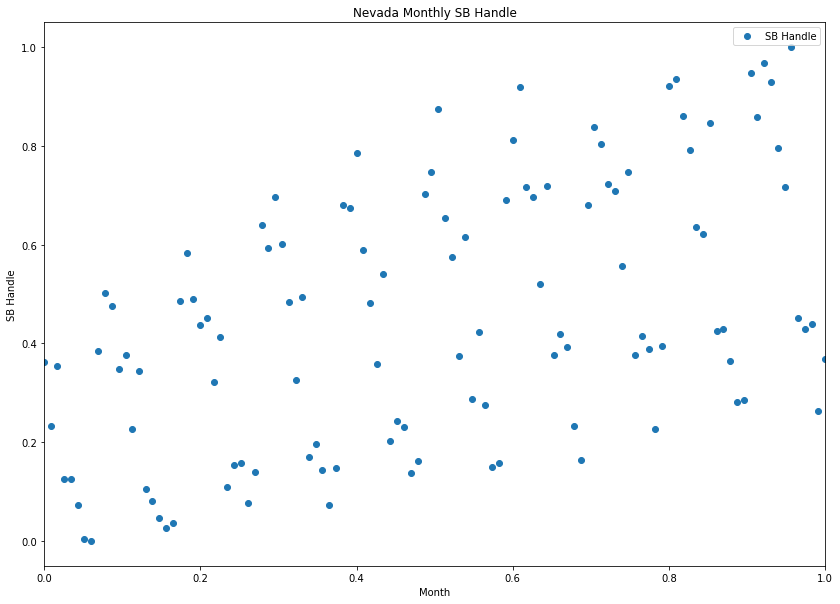

In [10]:
normalized_handle.plot(x=0, y=1, style='o')  
plt.title('Nevada Monthly SB Handle')  
plt.xlabel('Month')  
plt.ylabel('SB Handle')

plt.rcParams["figure.figsize"] = [14,10]

plt.show()

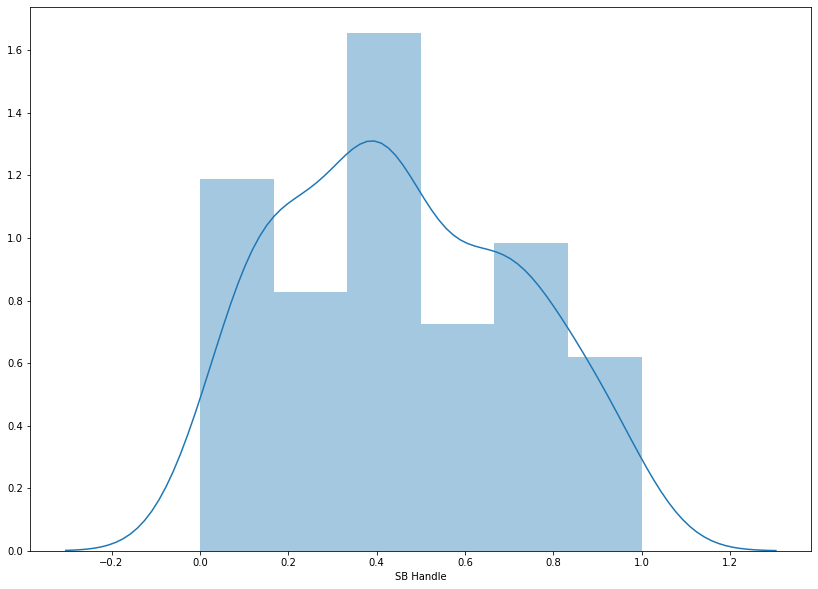

In [11]:
plt.figure(figsize=(14,10))
plt.tight_layout()
seabornInstance.distplot(normalized_handle['SB Handle'])

In [12]:
X = normalized_handle['Month'].values.reshape(-1,1)
y = normalized_handle['SB Handle'].values.reshape(-1,1)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [42]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

[0.24059817]
[[0.4184306]]


In [44]:
y_pred = regressor.predict(X_test)

In [45]:
nv = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
nv

,Actual,Predicted
0,0.475312,0.276952
1,0.718060,0.509786
2,0.150053,0.480607
3,0.202511,0.426076
4,0.000000,0.265950
5,0.232710,0.524375
6,0.919903,0.575438
7,0.226286,0.568024
8,0.928697,0.629969
9,0.615954,0.466017


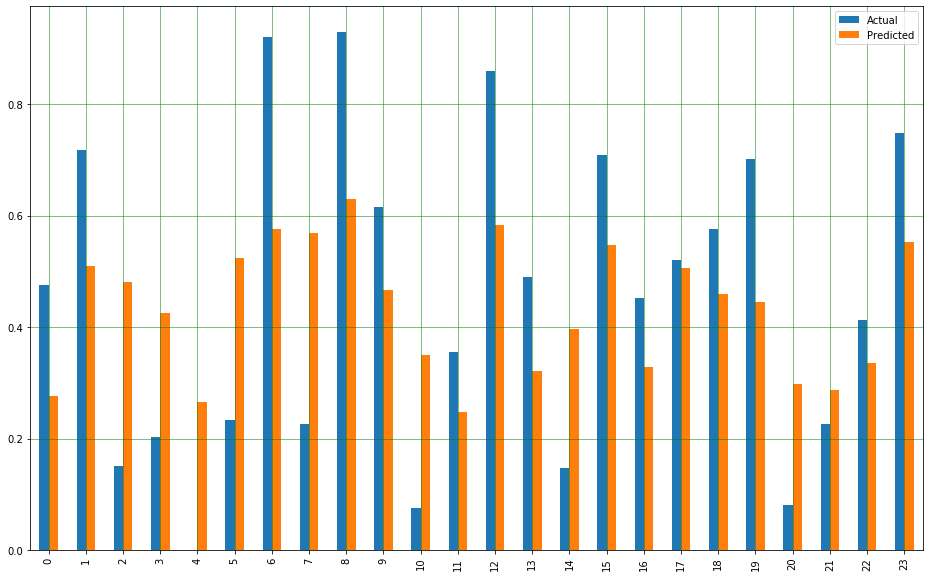

In [46]:
nv.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

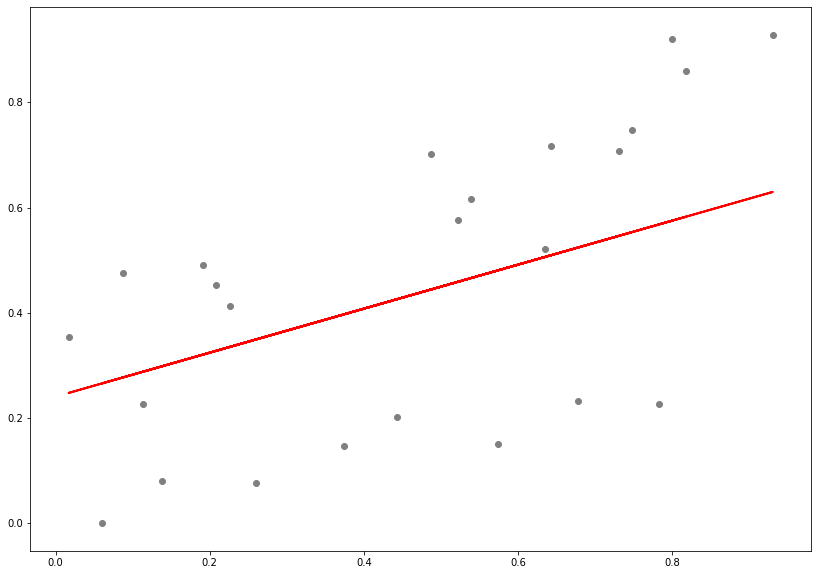

In [47]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [48]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.2065126272704719
Mean Squared Error: 0.0506682524679787
Root Mean Squared Error: 0.22509609607449593


In [49]:
#calculating for R squared value

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.3385735327822019